In [1]:
# Import pandas and numpy

import numpy as np 
import pandas as pd

# Import matplotlib and seaborn for plotting and to specify that graphs should be plotted inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

pd.set_option('display.max_rows', None)

In [2]:
# Read the csv file to store it under the name df

df=pd.read_csv("online_shoppers_intention.csv")

In [3]:
# Data Preprocessing

print(df.shape)
print(df.describe())
print(df.info())
df.head()

(12330, 18)
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Transform the data type of below mentioned features to object

df["OperatingSystems"] = df["OperatingSystems"].astype(object)
df["Browser"] = df["Browser"].astype(object)
df["Region"] = df["Region"].astype(object)
df["TrafficType"] = df["TrafficType"].astype(object)



#Remove columns
columns_to_remove = ['BounceRates','Administrative', 'Administrative_Duration', 'Informational','Informational_Duration','PageValues','SpecialDay','ProductRelated_Duration','ExitRates']  # Specifying columns to remove
df = df.drop(columns=columns_to_remove)

In [6]:
# Set target variable
y1=df['Revenue']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(df)
x_data1=data.drop(['Revenue'], axis = 1)

# Split the data

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y1, test_size = 0.3, random_state = 0)

# verify the shapes
#print("Shape of x_train :", x_train.shape)
#print("Shape of y_train :", y_train.shape)
#print("Shape of x_test :", x_test.shape)
#print("Shape of y_test :", y_test.shape)

In [7]:
#Unprocessed models 

In [8]:
# Logistic Regression
# Define function
logreg1 = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg1.fit(x_train1, y_train1)

# Predict target variable and the probability
y_pred_logreg=logreg1.predict(x_test1)
pred_prob1 = logreg1.predict_proba(x_test1)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg1.score(x_train1, y_train1))
print('Accuracy of logistic regression classifier on test set: ', logreg1.score(x_test1, y_test1))
print("AUC for logistic regression:", roc_auc_score(y_test1, pred_prob1))
print("f1_score:",f1_score(y_test1, y_pred_logreg))


Accuracy of logistic regression classifier on train set:  0.8498435870698644
Accuracy of logistic regression classifier on test set:  0.8331981616653149
AUC for logistic regression: 0.7119944991728905
f1_score: 0.060882800608828


In [9]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test1, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])

TP is: 20
TN is: 3062
FP is: 15
FN is: 602


In [10]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Go through all possible combinations: 9*9*9 models, with 5 fold cv??
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params, scoring = 'roc_auc')

# Train classifier
grid_tree.fit(x_train1, y_train1)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test1)
pred_prob3 = grid_tree.predict_proba(x_test1)[:,1]
f1 = f1_score(y_test1, y_pred_dt)
# Print train, test accuarcay and area under the curve score
print('Accuracy of Decision Tree classifier on train set: ', grid_tree.score(x_train1, y_train1))
print('Accuracy of Decision Tree classifier on test set: ', grid_tree.score(x_test1, y_test1))
print("AUC for Decision Tree:", roc_auc_score(y_test1, pred_prob3))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)
print("f1 score:", f1)




Accuracy of Decision Tree classifier on train set:  0.70883627101095
Accuracy of Decision Tree classifier on test set:  0.6940791914285744
AUC for Decision Tree: 0.6940791914285744
Accuracy: 0.6993756159557035
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
f1 score: 0.20460358056265984


In [11]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test1, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])



TP is: 80
TN is: 2997
FP is: 80
FN is: 542


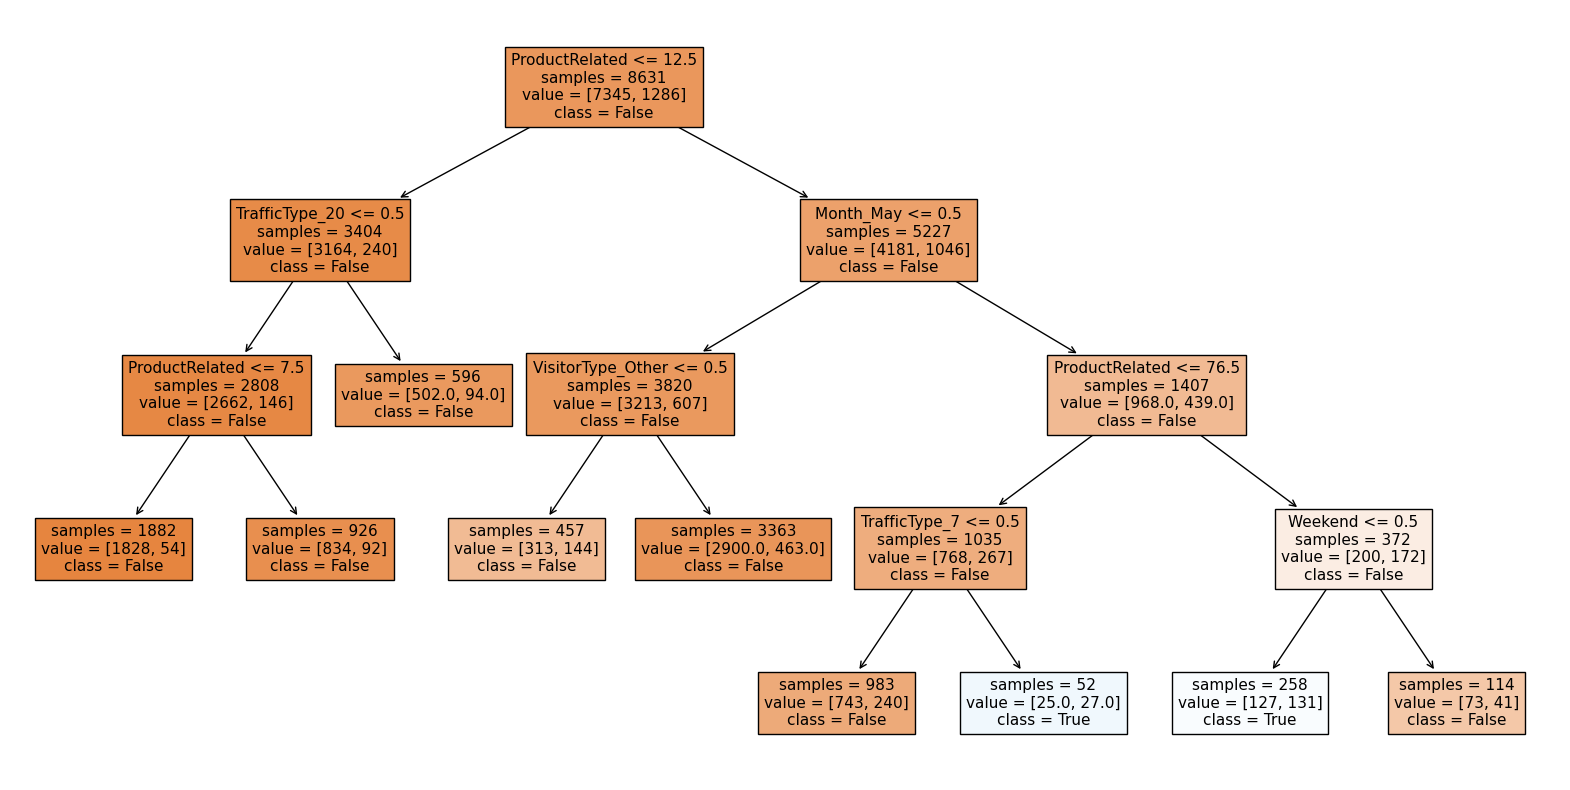

In [12]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()


In [13]:
# Random Forest

rf1 = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf1, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train1, y_train1)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test1)
f1 = f1_score(y_test1, y_pred_rf)
print('Accuracy of random forest classifier on train set: ', grid_rf_tree.score(x_train1, y_train1))
print('Accuracy of random forest classifier on test set: ', grid_rf_tree.score(x_test1, y_test1))
pred_prob4 = grid_rf_tree.predict_proba(x_test1)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test1, pred_prob4))
print("F1 Score:", f1)


Accuracy of random forest classifier on train set:  0.8093395174720268
Accuracy of random forest classifier on test set:  0.7234616964157891
AUC for random forest classifier: 0.7234616964157891
F1 Score: 0.0064


In [14]:
my_matrix_rf = confusion_matrix(y_test1, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])



TP is: 2
TN is: 3076
FP is: 1
FN is: 620


In [15]:
# Adaboost Ensemble Classifier 

dt2 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost1 = AdaBoostClassifier(dt2, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost1, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train1, y_train1)


y_pred_ada=grid_ada_tree.predict(x_test1)
pred_prob5 = grid_ada_tree.predict_proba(x_test1)[:,1]
f1 = f1_score(y_test1, y_pred_ada)


# Print train, test accuracy and area under the curve score

print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train1, y_train1))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test1, y_test1))
print("AUC for Adaboost:", roc_auc_score(y_test1, pred_prob5))
print("F1 Score:", f1)
print("Best learning rate:", grid_ada_tree.best_params_)



/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Accuracy of adaboost classifier on train set:  0.8514656470860851
Accuracy of adaboost classifier on test set:  0.8291430116247634
AUC for Adaboost: 0.7182505927705505
F1 Score: 0.021671826625386997
Best learning rate: {'learning_rate': 0.1}


In [16]:
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test1, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])



TP is: 7
TN is: 3060
FP is: 17
FN is: 615


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp1 = MLPClassifier(hidden_layer_sizes=(200,100,50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp1.fit(x_train1, y_train1)

# Predict on the test data
y_pred_mlp = mlp1.predict(x_test1)
pred_prob6 = mlp1.predict_proba(x_test1)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test1, y_pred_mlp)
auc_score = roc_auc_score(y_test1, pred_prob6)
# Calculate F1 score
f1 = f1_score(y_test1, y_pred_mlp)

# Print 
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




F1 Score: 0.14736842105263157
Test Accuracy: 0.8029197080291971
AUC for nn: 0.6839511488097041


In [18]:
# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)




Confusion Matrix:
TP: 63
TN: 2907
FP: 170
FN: 559


In [19]:
# Function to plot Stacked bar plot of a feature with conversion rate/ success rate on secondary Y axis

def get_revenue_proportion_plot(col_name):
    df_viz = df.copy()
    if col_name == 'Month':
        months = ["Jan", "Feb", "Mar", "Apr", "May", "June", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
        df_viz['Month'] = pd.Categorical(df_viz['Month'], categories=months, ordered=True)
    
    revenue_proportion = df_viz.groupby(col_name,as_index=True)['Revenue'].mean()
    revenue = pd.crosstab(df_viz[col_name],df_viz['Revenue'])
    revenue = pd.concat([revenue, revenue_proportion], axis=1)
    revenue[col_name] = revenue.index
    revenue = revenue.reset_index(drop=True)
    revenue.columns = ['False', 'True', 'Revenue', col_name]
    ax = revenue.plot(x=col_name,kind="bar", y=['False', 'True'], stacked=True, rot=0, ylabel="Traffic Count")
    ax2 = ax.twinx()
    revenue['Revenue'].plot(ax=ax2, color='k', marker='o')
    ax2.set_ylabel('Conversion Rate')
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in revenue['Revenue']])
    ax2.hlines(y=revenue['Revenue'].mean(), xmin=0, xmax = 20, linewidth=2, color='r',linestyles='--')
    

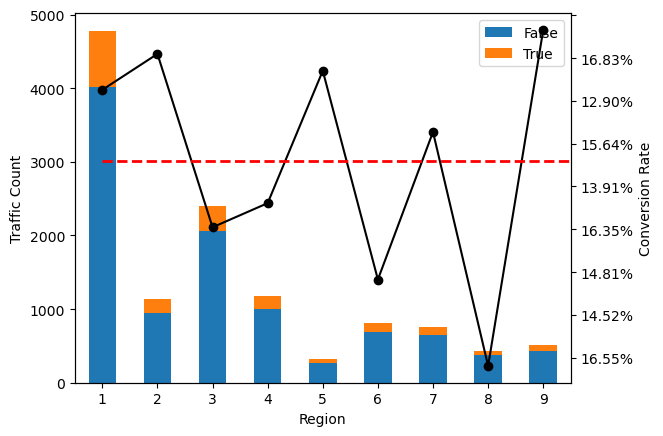

In [20]:
# Region analysis
get_revenue_proportion_plot('Region')

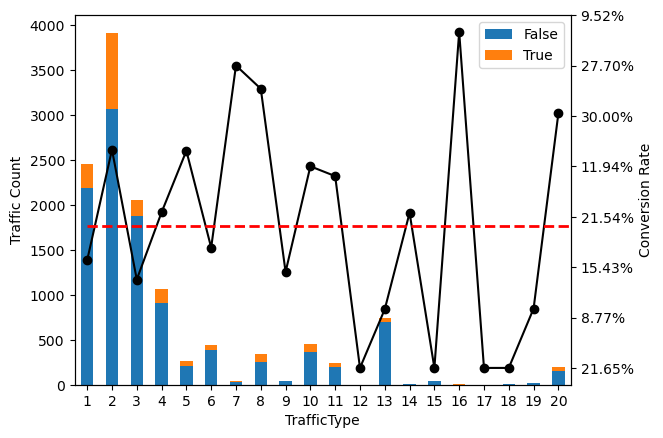

In [21]:
# TrafficType

get_revenue_proportion_plot('TrafficType')

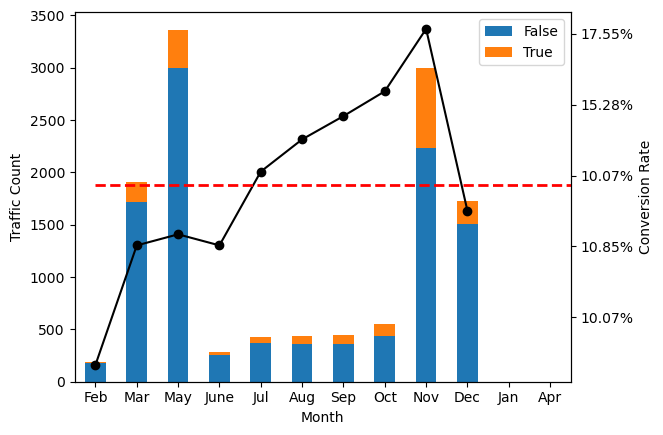

In [22]:
# Revenue analysis for each month
get_revenue_proportion_plot('Month')

In [23]:
df['Month'].unique()


array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

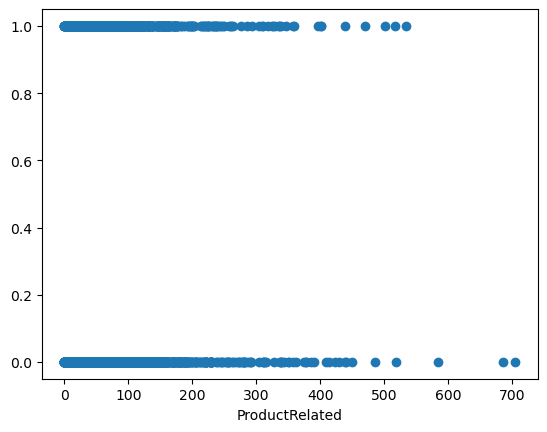

In [24]:
def continuous_cat(cont_col, cat_col = 'Revenue'):
    plt.scatter(x=df[cont_col], y=df[cat_col])
    plt.xlabel(c)
    plt.show()

for c in df.columns:
    if df[c].dtype==np.int64 or df[c].dtype==np.float64:
        continuous_cat(c, cat_col = 'Revenue')
        


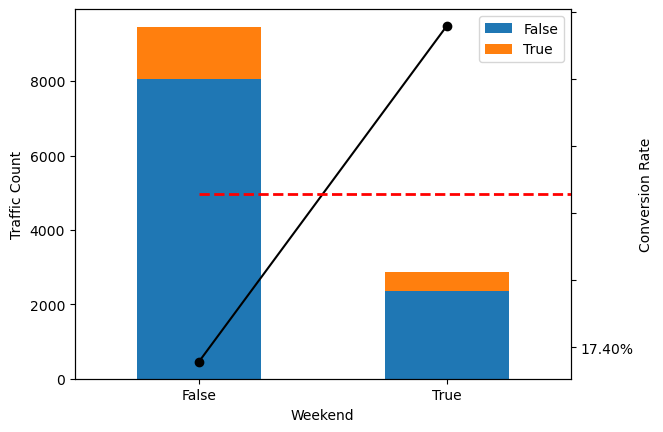

In [25]:
# Revenue analysis over weekend
get_revenue_proportion_plot("Weekend")

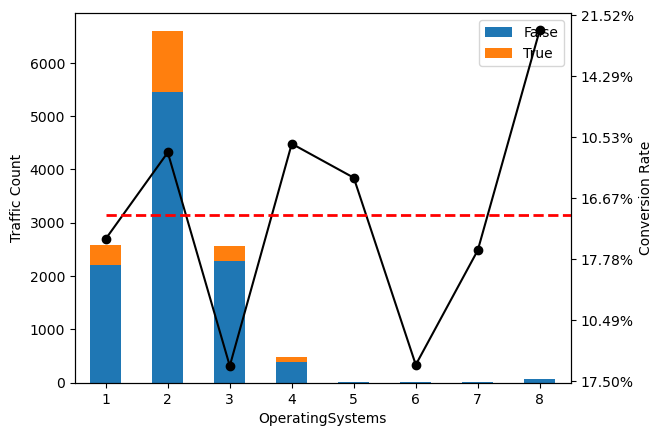

In [26]:
# # Revenue analysis over operating System
get_revenue_proportion_plot('OperatingSystems')

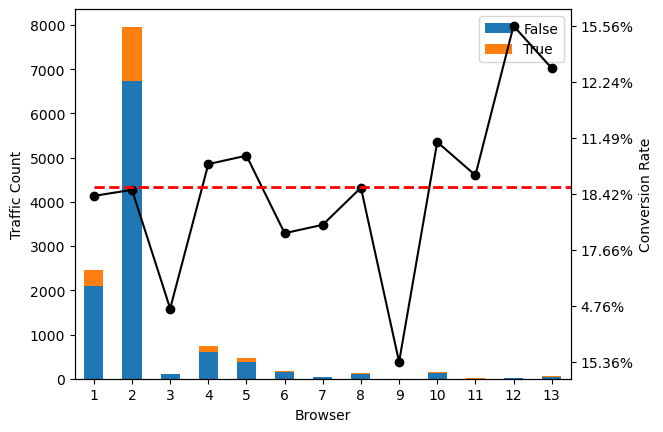

In [27]:
# # Revenue analysis based on browser types
get_revenue_proportion_plot('Browser')

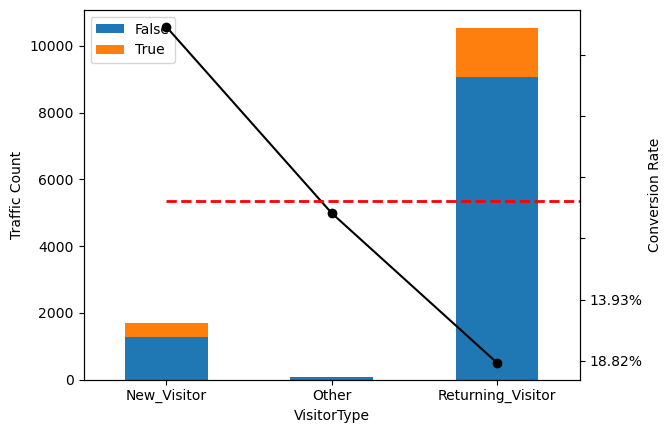

In [28]:
# # Revenue analysis based on different visitor type
get_revenue_proportion_plot("VisitorType")

In [29]:
# Set target variable
y=df['Revenue']

# Transform the categorical variables into dummies or indicator variables

data = pd.get_dummies(df)
x_data=data.drop(['Revenue'], axis = 1)

# Split the data

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.3, random_state = 0)

# verify the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)


Shape of x_train : (8631, 65)
Shape of y_train : (8631,)
Shape of x_test : (3699, 65)
Shape of y_test : (3699,)


In [30]:
y_test.count()

3699

In [31]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   ProductRelated                 12330 non-null  int64
 1   Weekend                        12330 non-null  bool 
 2   Month_Aug                      12330 non-null  bool 
 3   Month_Dec                      12330 non-null  bool 
 4   Month_Feb                      12330 non-null  bool 
 5   Month_Jul                      12330 non-null  bool 
 6   Month_June                     12330 non-null  bool 
 7   Month_Mar                      12330 non-null  bool 
 8   Month_May                      12330 non-null  bool 
 9   Month_Nov                      12330 non-null  bool 
 10  Month_Oct                      12330 non-null  bool 
 11  Month_Sep                      12330 non-null  bool 
 12  OperatingSystems_1             12330 non-null  bool 
 13  OperatingSystems

In [32]:
#Feature Selection
from sklearn.feature_selection import chi2

chi2_stats, p_values = chi2(x_data, y)

In [33]:
x_data.columns[p_values<0.05]

Index(['ProductRelated', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'Browser_3', 'Browser_13',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_10',
       'TrafficType_13', 'TrafficType_15', 'TrafficType_20',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [34]:
p_values[0]

0.0

In [35]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)
 
# Resample the training data
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)
 
# Check the shape of the resampled train data
print("Shape of resampled dataset:", x_train_resampled.shape, y_train_resampled.shape)
print("Shape of x_train_resampled:", x_train_resampled.shape)

Shape of resampled dataset: (14690, 65) (14690,)
Shape of x_train_resampled: (14690, 65)


In [36]:
#Models after 

In [37]:
# Logistic Regression
# Define function
logreg = LogisticRegression(penalty='l2', random_state=42, max_iter=10000)

# Train the classifier
logreg.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_logreg=logreg.predict(x_test)
pred_prob1 = logreg.predict_proba(x_test)[:,1]

# Print train, test accuarcay and area under the curve score
print('Accuracy of logistic regression classifier on train set: ', logreg.score(x_train_resampled, y_train_resampled))
print('Accuracy of logistic regression classifier on test set: ', logreg.score(x_test, y_test))
print("AUC for logistic regression:", roc_auc_score(y_test, pred_prob1))
print("f1_score:",f1_score(y_test, y_pred_logreg))


Accuracy of logistic regression classifier on train set:  0.6591558883594282
Accuracy of logistic regression classifier on test set:  0.6536901865369019
AUC for logistic regression: 0.7138477888535102
f1_score: 0.38443056222969724


In [38]:
print(logreg.coef_)
print(logreg.intercept_)


[[ 0.00861795  0.08022034  0.37557015 -0.17428951 -1.39390582  0.358972
  -0.38747477 -0.35246912 -0.09331642  0.62089316  0.41129762  0.38101985
  -0.06054138  0.13693861 -0.31633125  0.26530729 -0.69217629  0.20818693
   0.35853458 -0.15362136 -0.12617855 -0.10016769 -0.5580634   0.01531556
   0.01697931 -0.45388719 -0.43746651 -0.08937278 -0.09090365  0.38591336
  -0.69217629  0.92160217  0.95470277  0.03973525  0.14203277 -0.05108937
   0.10205074 -0.08342986 -0.22072866  0.11401685 -0.0962039  -0.2000867
  -0.2078549   0.33642203 -0.3213657   0.30605223  0.450833   -0.15052067
   0.75078513  0.59853252  0.3224279   0.39312167  0.29679718 -0.11567938
  -0.85227694 -0.02367252 -1.95520962  0.90339942 -0.12228748 -0.95850997
  -0.28471749  0.38002071  0.38070559 -0.33693337 -0.29747509]]
[-0.32666037]


In [39]:
exp_coeffs = np.exp(logreg.coef_)

# Get the column names of the DataFrame used for training
feature_names = x_data.columns

# Print the variable names along with the exponentiated coefficients
for coef, feature_name in zip(exp_coeffs[0], feature_names):
    print(f"{feature_name}: {coef}")
    
    

ProductRelated: 1.0086551922559386
Weekend: 1.083525786657885
Month_Aug: 1.4558212091868095
Month_Dec: 0.8400536605022219
Month_Feb: 0.24810435839755896
Month_Jul: 1.4318567081566371
Month_June: 0.67876875787114
Month_Mar: 0.7029502752923565
Month_May: 0.910905224001673
Month_Nov: 1.8605891104121002
Month_Oct: 1.5087743269583747
Month_Sep: 1.4637766629115652
OperatingSystems_1: 0.9412548166489387
OperatingSystems_2: 1.1467577478626607
OperatingSystems_3: 0.7288179891887168
OperatingSystems_4: 1.3038315715160438
OperatingSystems_5: 0.5004856833221762
OperatingSystems_6: 1.2314433474944804
OperatingSystems_7: 1.4312305181634881
OperatingSystems_8: 0.8575966768325975
Browser_1: 0.8814574509874066
Browser_2: 0.9046856963968233
Browser_3: 0.5723163402013692
Browser_4: 1.0154334491971302
Browser_5: 1.0171242754903853
Browser_6: 0.635154379607473
Browser_7: 0.6456701526371212
Browser_8: 0.9145046030988625
Browser_9: 0.9131056872191419
Browser_10: 1.47095721888431
Browser_11: 0.500485683322176

In [40]:
# Evaluate confusion matrix
my_matrix_logreg = confusion_matrix(y_test, y_pred_logreg) 
print("TP is:", my_matrix_logreg[1,1])
print("TN is:", my_matrix_logreg[0,0])
print("FP is:", my_matrix_logreg[0,1])
print("FN is:", my_matrix_logreg[1,0])

TP is: 400
TN is: 2018
FP is: 1059
FN is: 222


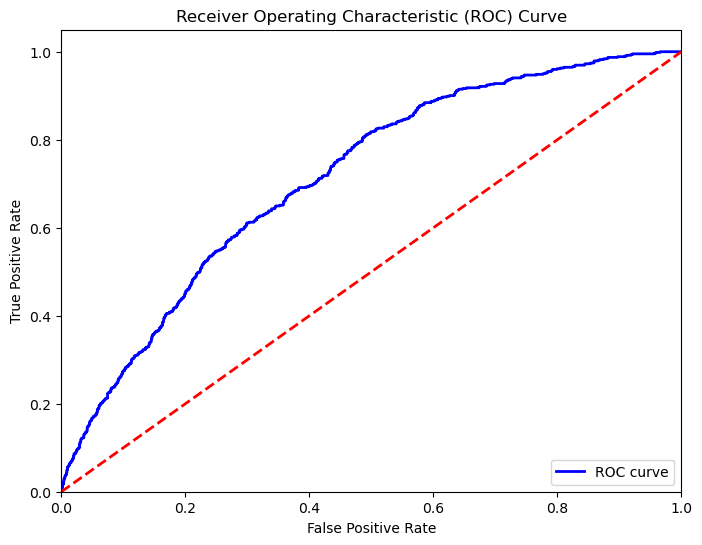

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [42]:
# Decision Tree
# Define function
opt_tree = DecisionTreeClassifier(random_state = 0) # here, impurity measure is default, Gini. more efficient

# Multiple hyperparameters to tune. separate elements by ,
# Go through all possible combinations: 9*9*9 models, with 5 fold cv??
# Define parameters
dt_params = {'max_depth':  range(1,10)         ,
             'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)   }

# Create function with gridsearch and cross validation
grid_tree = GridSearchCV(opt_tree, dt_params, scoring = 'roc_auc')

# Train classifier
grid_tree.fit(x_train_resampled, y_train_resampled)

# Predict target variable and the probability
y_pred_dt = grid_tree.predict(x_test)
pred_prob3 = grid_tree.predict_proba(x_test)[:,1]
f1 = f1_score(y_test, y_pred_dt)
# Print train, test accuarcay and area under the curve score
print('AUC of Decision Tree classifier on train set: ', grid_tree.score(x_train_resampled,y_train_resampled))
print('AUC of Decision Tree classifier on test set: ', grid_tree.score(x_test, y_test))
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob3))
print("Accuracy:", grid_tree.best_score_) #mean validation accuracy
print(grid_tree.best_params_)
print("f1 score:", f1)




AUC of Decision Tree classifier on train set:  0.719168409438354
AUC of Decision Tree classifier on test set:  0.7071867616492867
AUC for Decision Tree: 0.7071867616492867
Accuracy: 0.7186502443742032
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
f1 score: 0.38617401668653156


In [43]:
# Evaluate confusion matrix
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])



TP is: 324
TN is: 2345
FP is: 732
FN is: 298


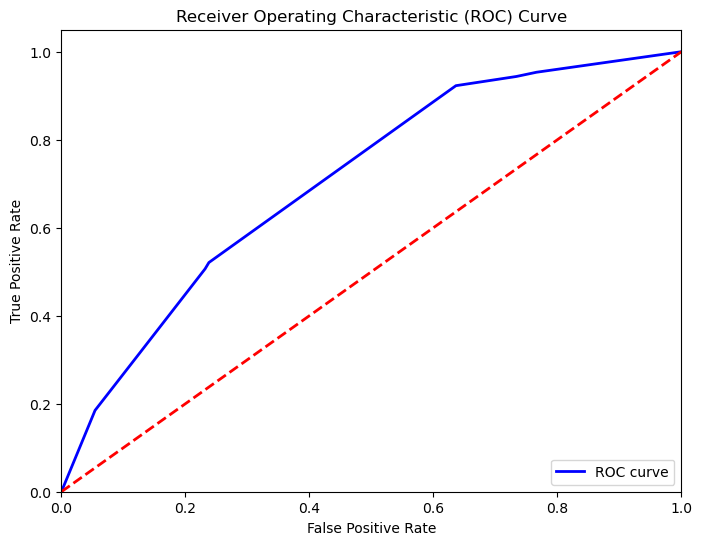

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob3)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [45]:
print(tree.export_text(grid_tree.best_estimator_)) 

|--- feature_0 <= 7.50
|   |--- feature_64 <= 0.50
|   |   |--- class: False
|   |--- feature_64 >  0.50
|   |   |--- feature_10 <= 0.50
|   |   |   |--- class: False
|   |   |--- feature_10 >  0.50
|   |   |   |--- class: True
|--- feature_0 >  7.50
|   |--- feature_9 <= 0.50
|   |   |--- feature_64 <= 0.50
|   |   |   |--- class: True
|   |   |--- feature_64 >  0.50
|   |   |   |--- feature_54 <= 0.50
|   |   |   |   |--- feature_44 <= 0.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_44 >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- feature_54 >  0.50
|   |   |   |   |--- class: False
|   |--- feature_9 >  0.50
|   |   |--- feature_0 <= 50.50
|   |   |   |--- class: True
|   |   |--- feature_0 >  50.50
|   |   |   |--- class: True



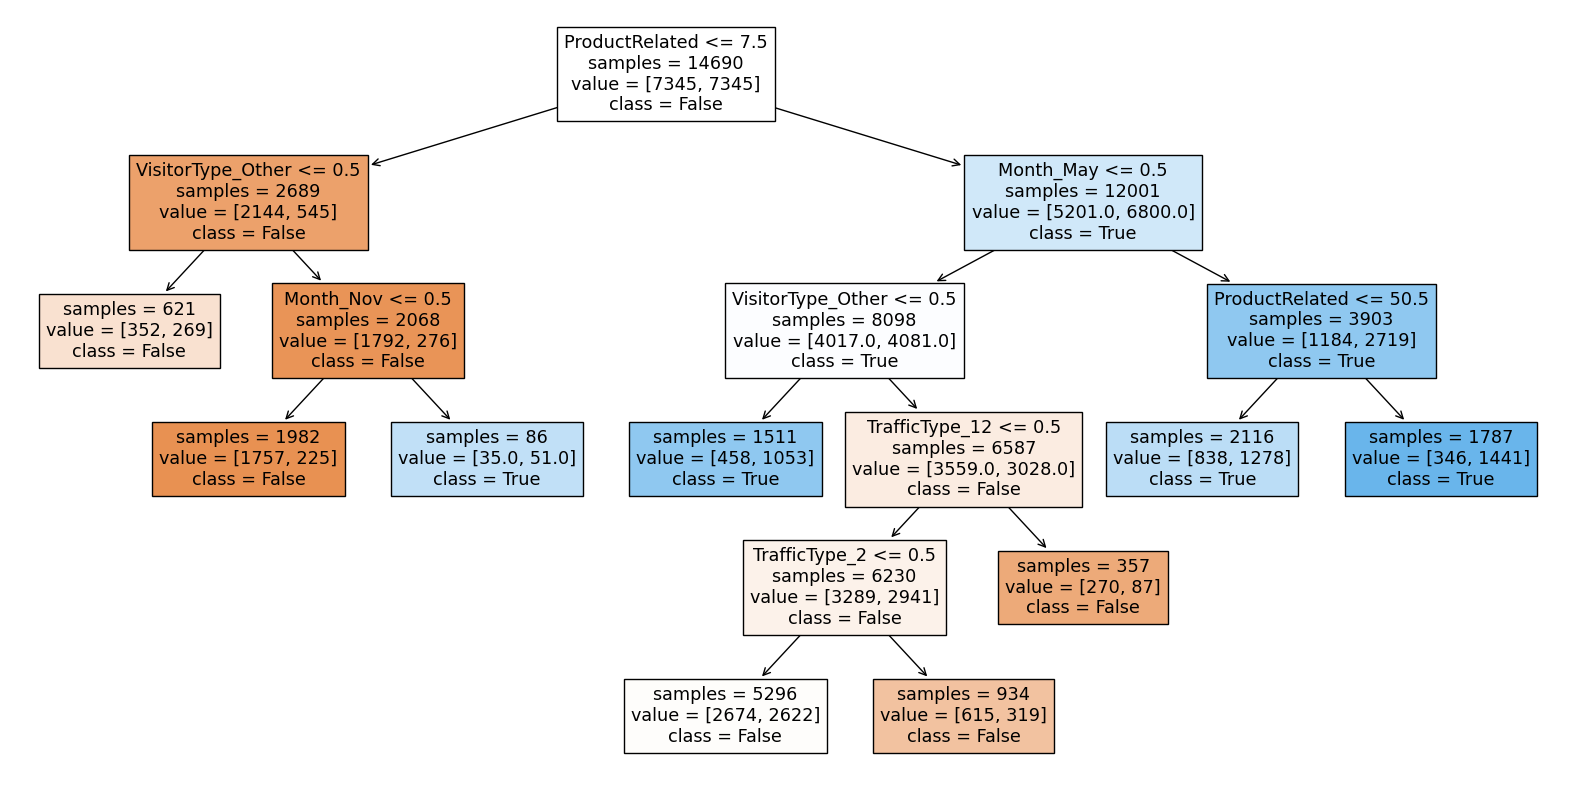

In [46]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) 
class_names = df['Revenue'].astype(str).unique().tolist()
tree.plot_tree(grid_tree.best_estimator_, 
               feature_names = data.columns.tolist(), # specify variable names 
               class_names = class_names, # specify class (Y) names
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read # impurity = False means we don't need the IG or Gini
plt.show()


In [47]:
# Random Forest

rf = RandomForestClassifier(bootstrap=True, random_state = 42) 
dt_params_3 = {'n_estimators':np.arange(100,800,100),'max_samples':np.arange(100,800,100)}
grid_rf_tree = GridSearchCV(rf, dt_params_3,cv=5, scoring='roc_auc', n_jobs=2)
grid_rf_tree.fit(x_train_resampled, y_train_resampled)
# estimator dropped, estimator will be tree
y_pred_rf = grid_rf_tree.predict(x_test)
f1 = f1_score(y_test, y_pred_rf)
print('AUC of random forest classifier on train set: ', grid_rf_tree.score(x_train_resampled, y_train_resampled))
print('AUC of random forest classifier on test set: ', grid_rf_tree.score(x_test, y_test))
pred_prob4 = grid_rf_tree.predict_proba(x_test)[:,1]
print("AUC for random forest classifier:", roc_auc_score(y_test, pred_prob4))
print("F1 Score:", f1)


AUC of random forest classifier on train set:  0.8977731756968731
AUC of random forest classifier on test set:  0.7297086463513653
AUC for random forest classifier: 0.7297086463513653
F1 Score: 0.40352697095435686


In [48]:
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])



TP is: 389
TN is: 2160
FP is: 917
FN is: 233


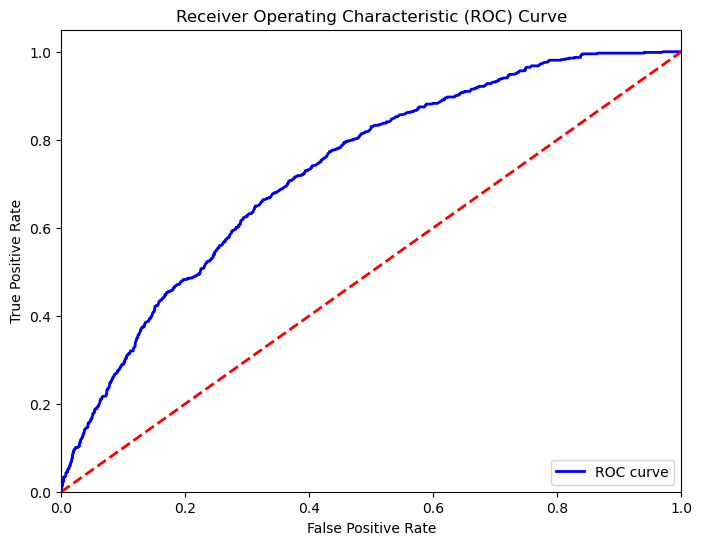

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob4)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [50]:
# Adaboost Ensemble Classifier 

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dt_params2 = {'learning_rate':  np.arange(0,1.1,0.1)}
adaboost = AdaBoostClassifier(dt1, n_estimators = 500, random_state = 42)
grid_ada_tree = GridSearchCV(adaboost, dt_params2,cv=5,n_jobs=2)
grid_ada_tree.fit(x_train_resampled, y_train_resampled)


y_pred_ada=grid_ada_tree.predict(x_test)
pred_prob5 = grid_ada_tree.predict_proba(x_test)[:,1]
f1 = f1_score(y_test, y_pred_ada)




# Print train, test accuracy and area under the curve score

print('Accuracy of adaboost classifier on train set: ', grid_ada_tree.score(x_train_resampled, y_train_resampled))
print('Accuracy of adaboost classifier on test set: ', grid_ada_tree.best_estimator_.score(x_test, y_test))
print("AUC for Adaboost:", roc_auc_score(y_test, pred_prob5))
print("F1 Score:", f1)
print("Best learning rate:", grid_ada_tree.best_params_)



/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/maddy16/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Accuracy of adaboost classifier on train set:  0.6831177671885637
Accuracy of adaboost classifier on test set:  0.6439578264395782
AUC for Adaboost: 0.7131403306557207
F1 Score: 0.39448275862068966
Best learning rate: {'learning_rate': 1.0}


In [51]:
# Evaluate confusion matrix
my_matrix_adaboost = confusion_matrix(y_test, y_pred_ada)
print("TP is:", my_matrix_adaboost[1,1])
print("TN is:", my_matrix_adaboost[0,0])
print("FP is:", my_matrix_adaboost[0,1])
print("FN is:", my_matrix_adaboost[1,0])



TP is: 429
TN is: 1953
FP is: 1124
FN is: 193


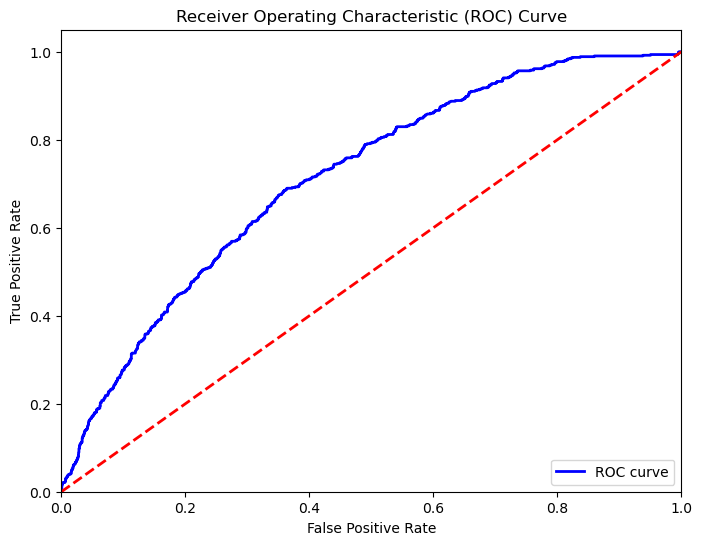

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob5)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# Define and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200,100,50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(x_train_resampled, y_train_resampled)

# Predict on the test data
y_pred_mlp = mlp.predict(x_test)
pred_prob6 = mlp.predict_proba(x_test)[:, 1]

# Calculate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_mlp)
auc_score = roc_auc_score(y_test, pred_prob6)
# Calculate F1 score
f1 = f1_score(y_test, y_pred_mlp)

# Print 
print("F1 Score:", f1)
print("Test Accuracy:", accuracy)
print("AUC for nn:", auc_score)




F1 Score: 0.296411856474259
Test Accuracy: 0.7561503108948364
AUC for nn: 0.6738063863515952


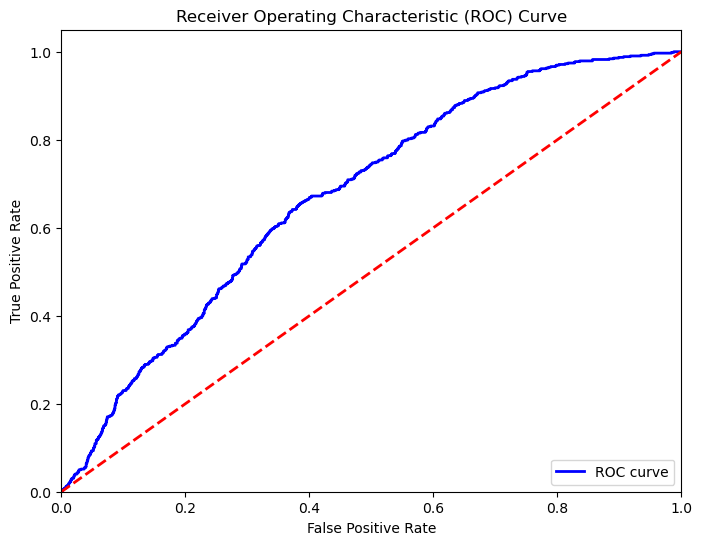

In [55]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, pred_prob6)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [56]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
tn, fp, fn, tp = cm.ravel()
print("Confusion Matrix:")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)




Confusion Matrix:
TP: 190
TN: 2607
FP: 470
FN: 432
